In [7]:
from utils.get_dataset import get_all_clinical_data
from baseline_clinical_r import preprocess_features
import os

In [ ]:

path = os.path.dirname(os.path.abspath(''))
path = os.path.join(path, 'clinical_csv_consistent')

df = get_all_clinical_data(path)

In [ ]:
df.head()

,case_id,slide_id,submitter_id,tumor_type,project_id,site_of_resection_or_biopsy,sex,OncotreeCode,cancer_type_detailed,tissue_source_site,...,dss_cr_survival_days,dfi_cr_censorship,dfi_cr_survival_days,pfi_cr_censorship,pfi_cr_survival_days,pfi_v1_cr_censorship,pfi_v1_cr_survival_days,pfi_v2_cr_censorship,pfi_v2_cr_survival_days,disc_label
0,TCGA-3C-AALI,TCGA-3C-AALI-01Z-00-DX2.CF4496E0-AB52-4F3E-BDF...,TCGA-3C-AALI,Primary,TCGA-BRCA,"Breast, NOS",F,IDC,Breast Invasive Ductal Carcinoma,3C,...,4005.0,1.0,4005.0,1.0,4005.0,1.0,4005.0,1.0,4005.0,3
1,TCGA-3C-AALI,TCGA-3C-AALI-01Z-00-DX1.F6E9A5DF-D8FB-45CF-B4B...,TCGA-3C-AALI,Primary,TCGA-BRCA,"Breast, NOS",F,IDC,Breast Invasive Ductal Carcinoma,3C,...,4005.0,1.0,4005.0,1.0,4005.0,1.0,4005.0,1.0,4005.0,3
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01Z-00-DX2.62DFE56B-B84C-40F9-962...,TCGA-3C-AALJ,Primary,TCGA-BRCA,"Breast, NOS",F,IDC,Breast Invasive Ductal Carcinoma,3C,...,1474.0,1.0,1474.0,1.0,1474.0,1.0,1474.0,1.0,1474.0,2
3,TCGA-3C-AALJ,TCGA-3C-AALJ-01Z-00-DX1.777C0957-255A-42F0-9EE...,TCGA-3C-AALJ,Primary,TCGA-BRCA,"Breast, NOS",F,IDC,Breast Invasive Ductal Carcinoma,3C,...,1474.0,1.0,1474.0,1.0,1474.0,1.0,1474.0,1.0,1474.0,2
4,TCGA-3C-AALK,TCGA-3C-AALK-01Z-00-DX1.4E6EB156-BB19-410F-878...,TCGA-3C-AALK,Primary,TCGA-BRCA,"Breast, NOS",F,IDC,Breast Invasive Ductal Carcinoma,3C,...,1448.0,NaN,NaN,1.0,1448.0,1.0,1448.0,1.0,1448.0,2


In [6]:
def feature_selection(df, multimodal=False):
    selected_features = [
        'cancer_type_detailed',
        'tissue_source_site',
        'OncoTreeSiteCode',
        'age_at_initial_pathologic_diagnosis',
        'race',
        'ajcc_pathologic_tumor_stage',
        'clinical_stage',
        'histological_type',
        'histological_grade',
        'initial_pathologic_dx_year',
        'menopause_status',
        'birth_days_to',
        'vital_status',
        'tumor_status',
        'margin_status',
        'disc_label',
    ]
    if multimodal:
        selected_features.insert(0, 'case_id')
    selected_features = [col for col in selected_features if col in df.columns]
    return selected_features

In [ ]:
feature_cols = feature_selection(df)
clean_df = preprocess_features(df, feature_cols)

In [9]:
# clean_df is a tuple: (df, label_encoders, cat_cols, num_cols)
df_clean = clean_df[0]

correlations = df_clean.corr(numeric_only=True)['disc_label'].sort_values(ascending=False)
print(correlations)

disc_label                             1.000000
birth_days_to                          0.149456
vital_status                           0.128048
race                                   0.047445
histological_type                      0.010855
tumor_status                          -0.016022
cancer_type_detailed                  -0.019088
menopause_status                      -0.063118
margin_status                         -0.065935
tissue_source_site                    -0.118065
age_at_initial_pathologic_diagnosis   -0.144671
ajcc_pathologic_tumor_stage           -0.156735
initial_pathologic_dx_year            -0.589340
OncoTreeSiteCode                            NaN
clinical_stage                              NaN
histological_grade                          NaN
Name: disc_label, dtype: float64


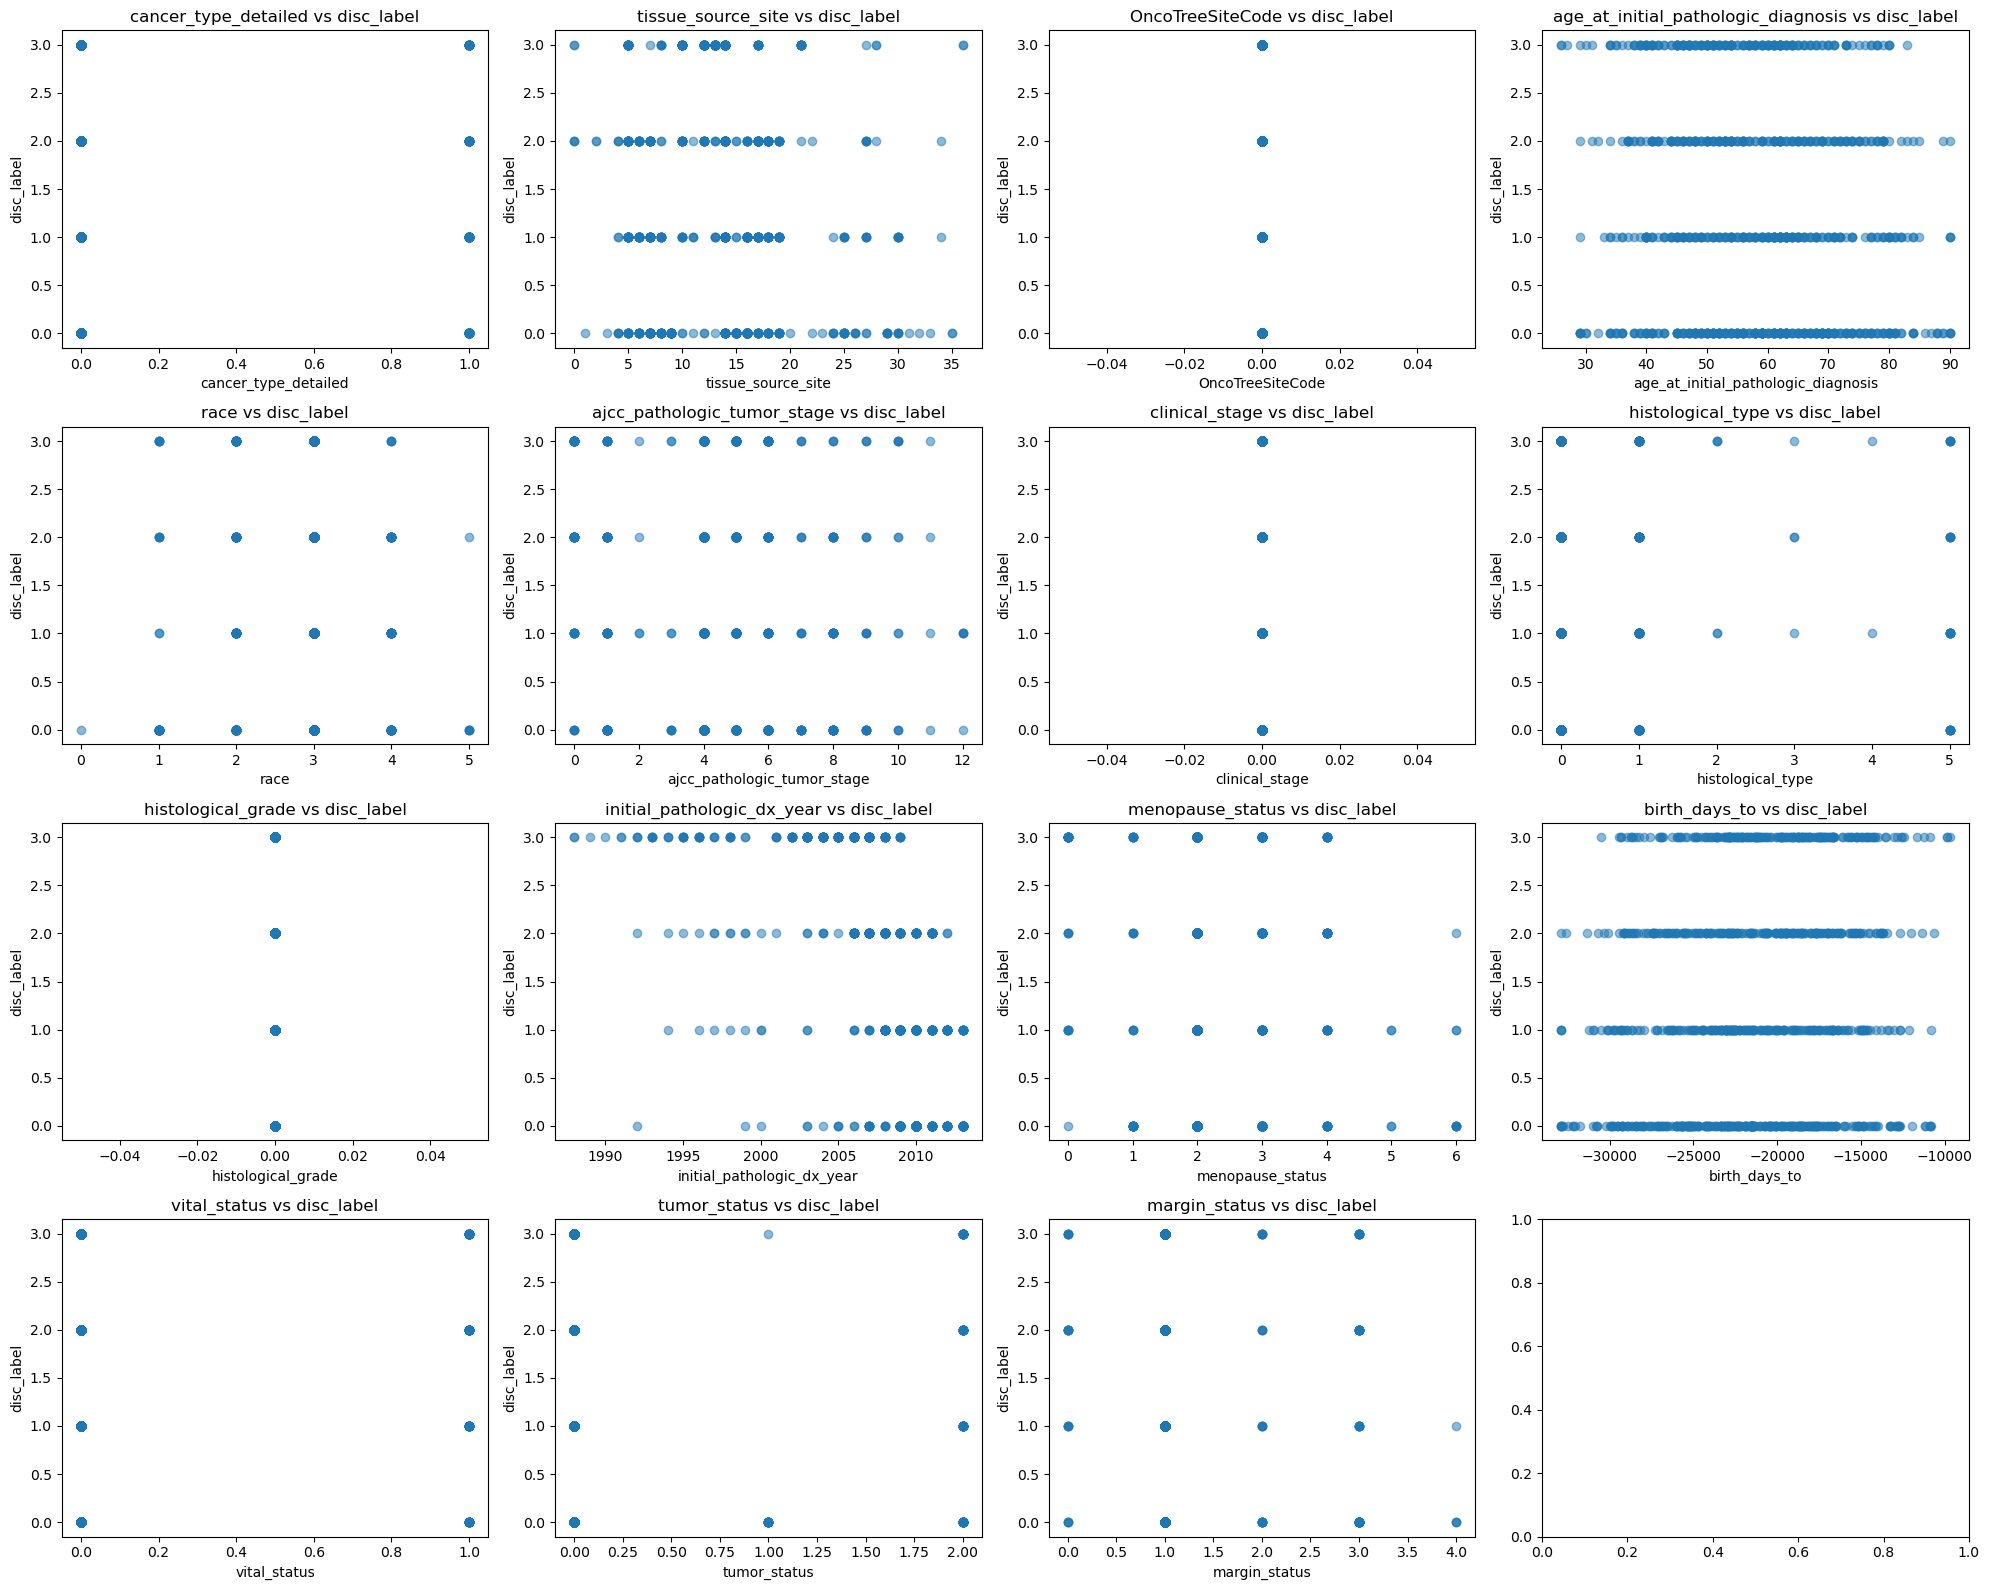

In [17]:
import matplotlib.pyplot as plt

df_clean = clean_df[0]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
axes = axes.flatten()

for idx, col in enumerate(df_clean.columns):
    if col == 'disc_label':
        continue
    ax = axes[idx]
    ax.scatter(df_clean[col], df_clean['disc_label'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('disc_label')
    ax.set_title(f'{col} vs disc_label')

plt.tight_layout()
plt.show()